In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [35]:
# Load the preprocessed dataset
X_train = pd.read_csv('D:/Task/Asoj/30/Customer_Churn_Project/Data_Preparation/X_train.csv')

In [36]:
# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
silhouette_scores = []

In [37]:
# Range of clusters to try
cluster_range = range(2, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))


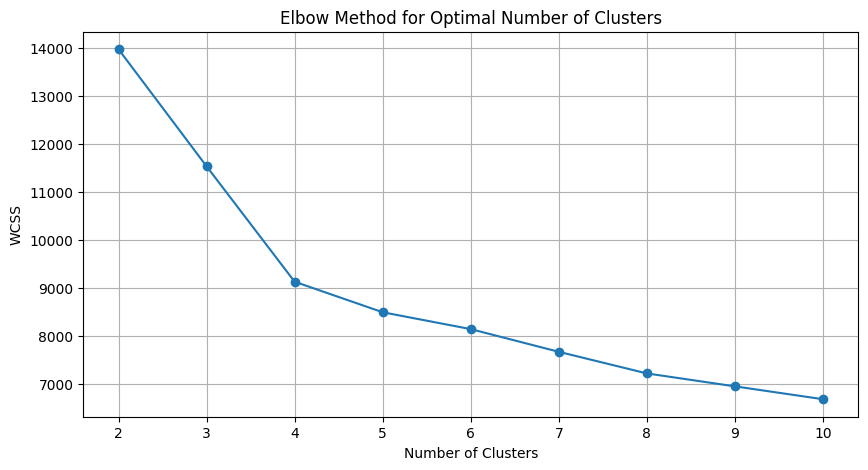

In [38]:
# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid()
plt.savefig('elbow_method_plot.png')
plt.show()

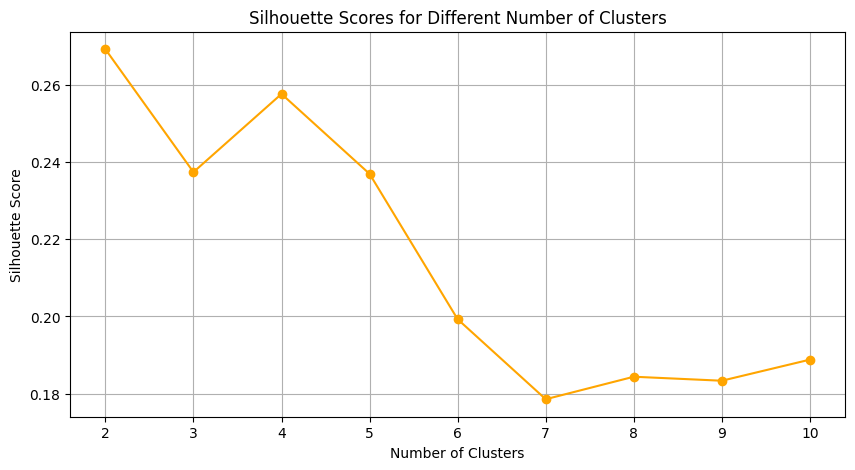

In [39]:
# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.savefig('silhouette_scores_plot.png')
plt.show()

In [41]:
optimal_clusters = 4  # Change based on elbow plot observation
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [42]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [43]:
# Assign clusters to the dataset
X_train['Cluster'] = kmeans.labels_

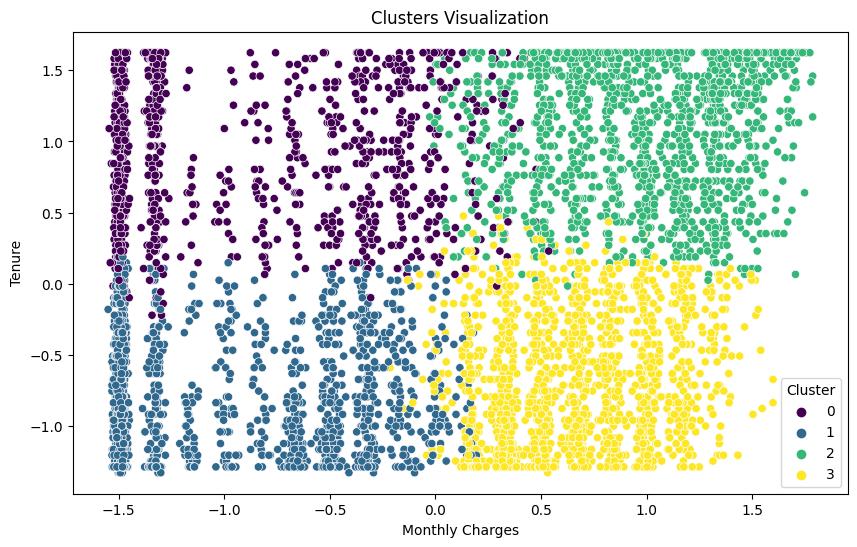

In [44]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='MonthlyCharges', y='tenure', hue='Cluster', palette='viridis', markers='o')
plt.title('Clusters Visualization')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.legend(title='Cluster')
plt.savefig('cluster_visualization.png')
plt.show()
